In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Display all columns
pd.set_option('display.max_columns', None)

In [3]:
# load store dataset
df_store = pd.read_csv(r"K:\DS\retail_sales_prediction_fp\stores_data_set.csv")
df_store

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [4]:
# identify and remove null values in stores_data
df_store.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [5]:
# load sales dataset
df_sales = pd.read_csv(r"K:\DS\retail_sales_prediction_fp\sales_data_set.csv")
df_sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


In [6]:
# identify and remove null values in sales_data
df_sales.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [7]:
# load features dataset
df_feature = pd.read_csv(r"K:\DS\retail_sales_prediction_fp\Features_data_set.csv")
df_feature

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [8]:
# identify null values in features_data
df_feature.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [9]:
# combine store and sales dataframe into single dataframe based on 'store' column
df1 = pd.merge(df_sales, df_store, on='Store', how='inner')
df1

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,05/02/2010,24924.50,False,A,151315
1,1,1,12/02/2010,46039.49,True,A,151315
2,1,1,19/02/2010,41595.55,False,A,151315
3,1,1,26/02/2010,19403.54,False,A,151315
4,1,1,05/03/2010,21827.90,False,A,151315
...,...,...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False,B,118221
421566,45,98,05/10/2012,628.10,False,B,118221
421567,45,98,12/10/2012,1061.02,False,B,118221
421568,45,98,19/10/2012,760.01,False,B,118221


In [10]:
# identify null values in df1
df1.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
dtype: int64

In [11]:
# combine store and feature dataframe into single datarame based on 'store' column
df2 = pd.merge(df_store, df_feature, on='Store', how='inner')
df2

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,A,151315,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,A,151315,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,A,151315,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,A,151315,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,A,151315,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,B,118221,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,B,118221,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,B,118221,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,B,118221,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [12]:
# identify null values in df2
df2.isnull().sum()

Store              0
Type               0
Size               0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [13]:
# create unique column (diff) for the combination of store and date
df1['diff'] = df1['Store'].astype(str) + '-' + df1['Date']
df2['diff'] = df2['Store'].astype(str) + '-' + df2['Date']
df2.head(2)

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,diff
0,1,A,151315,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1-05/02/2010
1,1,A,151315,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,1-12/02/2010


df1 have 2010 to 2012-oct data
df2 have 2010 to 2013 data
so we need to split (2010 to 2012-oct data) and (2012-nov to 2013 data) from df2 and (2010 to 2012-oct data) add to df1

In [14]:
# make list with diff column for df1
df1_list = df1['diff'].to_list()

In [15]:
# filter 2010 to 2012-oct data from df2 based on df1_list
df2_inlist = df2[df2['diff'].isin(df1_list)]
df2_inlist.reset_index(drop=True, inplace=True)
df2_inlist

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,diff
0,1,A,151315,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1-05/02/2010
1,1,A,151315,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,1-12/02/2010
2,1,A,151315,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,1-19/02/2010
3,1,A,151315,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,1-26/02/2010
4,1,A,151315,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,1-05/03/2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,B,118221,28/09/2012,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False,45-28/09/2012
6431,45,B,118221,05/10/2012,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False,45-05/10/2012
6432,45,B,118221,12/10/2012,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False,45-12/10/2012
6433,45,B,118221,19/10/2012,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False,45-19/10/2012


In [16]:
df2_inlist.shape

(6435, 15)

In [17]:
# anther filter for 2012-oct to 2013 data from df2 not in df1_list
df2_notinlist = df2[~df2['diff'].isin(df1_list)]
df2_notinlist.reset_index(drop=True, inplace=True)
df2_notinlist.tail(10)

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,diff
1745,45,B,118221,24/05/2013,67.11,3.627,3249.34,481.82,58.48,1183.23,1309.30,NaN,NaN,False,45-24/05/2013
1746,45,B,118221,31/05/2013,65.88,3.646,6474.49,411.38,77.06,9.38,4227.27,NaN,NaN,False,45-31/05/2013
1747,45,B,118221,07/06/2013,70.71,3.633,9977.82,744.29,80.00,4825.71,3597.34,NaN,NaN,False,45-07/06/2013
1748,45,B,118221,14/06/2013,70.01,3.632,2471.44,517.87,348.54,2612.33,3459.39,NaN,NaN,False,45-14/06/2013
1749,45,B,118221,21/06/2013,70.13,3.626,4989.34,385.31,178.56,2463.42,3117.94,NaN,NaN,False,45-21/06/2013
1750,45,B,118221,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,45-28/06/2013
1751,45,B,118221,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,45-05/07/2013
1752,45,B,118221,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,45-12/07/2013
1753,45,B,118221,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,45-19/07/2013
1754,45,B,118221,26/07/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False,45-26/07/2013


In [18]:
df2_notinlist.shape

(1755, 15)

In [19]:
# merge df1 and df2(2010 to 2012-oct) data based on 'diff' column
# 'inner' - merge columns based on exact 'diff' in both dataframes
df3 = pd.merge(df1, df2_inlist, on='diff', how='inner')
df3.tail()

,Store_x,Dept,Date_x,Weekly_Sales,IsHoliday_x,Type_x,Size_x,diff,Store_y,Type_y,Size_y,Date_y,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
421565,45,98,28/09/2012,508.37,False,B,118221,45-28/09/2012,45,B,118221,28/09/2012,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False
421566,45,98,05/10/2012,628.10,False,B,118221,45-05/10/2012,45,B,118221,05/10/2012,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False
421567,45,98,12/10/2012,1061.02,False,B,118221,45-12/10/2012,45,B,118221,12/10/2012,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False
421568,45,98,19/10/2012,760.01,False,B,118221,45-19/10/2012,45,B,118221,19/10/2012,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False
421569,45,98,26/10/2012,1076.80,False,B,118221,45-26/10/2012,45,B,118221,26/10/2012,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,False


In [20]:
# drop the duplicate columns and rename it
df3.drop(columns=['Store_y','Type_y','Size_y','Date_y','IsHoliday_y'], inplace=True)
df3.rename(columns={'Store_x':'Store', 'Date_x':'Date', 'IsHoliday_x':'IsHoliday', 'Type_x':'Type', 'Size_x':'Size'}, inplace=True)
df3.shape

(421570, 17)

In [21]:
# df1 (2010 to 2012-oct)           - 'Store', 'Date', 'Dept'
# df2_notinlist (2012-nov to 2013) - 'Store', 'Date'- 'Dept' is missing
# so we need make df2_notinlist into 'Dept' wise data
# filter 'store' and 'dept' column from sales dataframe
s = df_sales[['Store','Dept']]
s

,Store,Dept
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
421565,45,98
421566,45,98
421567,45,98
421568,45,98


In [22]:
# remove duplicates from the combination of 'store' and 'dept'
s.drop_duplicates(subset=['Store', 'Dept'], inplace=True)
s.reset_index(drop=True, inplace=True)
s

,Store,Dept
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5
...,...,...
3326,45,94
3327,45,95
3328,45,96
3329,45,97


In [23]:
# make dataframe of 's' and 'df2_notinlist (2012-nov to 2013)' based on 'store' column
# outer - it create rows for all combinations like (store,dept,date,etc.,)
df4 = pd.merge(s, df2_notinlist, on='Store', how='outer')
df4.tail()

,Store,Dept,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,diff
129904,45,98,B,118221,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,45-28/06/2013
129905,45,98,B,118221,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,45-05/07/2013
129906,45,98,B,118221,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,45-12/07/2013
129907,45,98,B,118221,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,45-19/07/2013
129908,45,98,B,118221,26/07/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False,45-26/07/2013


In [24]:
df4.shape

(129909, 16)

In [25]:
# concatinate both dataframes into single dataframe (2010 to 2013)
df5 = pd.concat([df3, df4])
df5.reset_index(drop=True, inplace=True)
df5.tail()
df5.shape

(551479, 17)

In [26]:
# Datatype conversion using pandas
df5['Date'] = df5['Date'].apply(lambda x: x.replace('/','-'))
df5['Date'] = pd.to_datetime(df5['Date'], format='%d-%m-%Y', errors='coerce')
# encoding for catagorical features into numerical
df5['IsHoliday'] = df5['IsHoliday'].map({True:1, False:0})
df5['Type'] = df5['Type'].map({'A':1, 'B':2, 'C':3})
df5.tail(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,diff,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
551476,45,98,2013-07-12,NaN,0,2,118221,45-12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN
551477,45,98,2013-07-19,NaN,0,2,118221,45-19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN
551478,45,98,2013-07-26,NaN,0,2,118221,45-26/07/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN


In [27]:
# drop 'diff' column and sort the dataframe in ascending order

df5.drop(columns=['diff'], inplace=True)
df5 = df5.sort_values(by=['Date','Store','Dept'])
df5.reset_index(drop=True, inplace=True)
df5.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [28]:
# make Date feature into --> Day,Month,Year new features and drop Date column
df5['Day'] = df5['Date'].dt.day
df5['Month'] = df5['Date'].dt.month
df5['Year'] = df5['Date'].dt.year
df5.drop(columns=['Date'], inplace=True)
df5

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Day,Month,Year
0,1,1,24924.50,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010
1,1,2,50605.27,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010
2,1,3,13740.12,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010
3,1,4,39954.04,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010
4,1,5,32229.38,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,26,7,2013
551475,45,95,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,26,7,2013
551476,45,96,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,26,7,2013
551477,45,97,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,26,7,2013


In [29]:
# rearrange the columns order

df_main = df5[['Day','Month','Year','Store','Dept','Type','Weekly_Sales','Size','IsHoliday','Temperature',
           'Fuel_Price', 'MarkDown1', 'MarkDown2','MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']]
df_main.tail()

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551478,26,7,2013,45,98,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN


In [30]:
# check datatypes of all features and everything in numerical
df_main.dtypes

Day               int32
Month             int32
Year              int32
Store             int64
Dept              int64
Type              int64
Weekly_Sales    float64
Size              int64
IsHoliday         int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
dtype: object

In [31]:
# check null values of all features
df_main.isnull().sum()

Day                  0
Month                0
Year                 0
Store                0
Dept                 0
Type                 0
Weekly_Sales    129909
Size                 0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       271074
MarkDown2       343582
MarkDown3       296860
MarkDown4       302830
MarkDown5       270138
CPI              43303
Unemployment     43303
dtype: int64

In [31]:
# This shows that the null values are present for these features --> Weekly_Sales, MarkDown(1,2,3,4,5), CPI, Unemployment
# Weekly_Sales    129909
# MarkDown1       271074
# MarkDown2       343582
# MarkDown3       296860
# MarkDown4       302830
# MarkDown5       270138
# CPI              43303
# Unemployment     43303

In [32]:
df_main.describe().T

,count,mean,std,min,25%,50%,75%,max
Day,551479.0,15.653488,8.776044,1.000,8.000000,16.000000,23.000000,31.000000
Month,551479.0,6.277180,3.340134,1.000,3.000000,6.000000,9.000000,12.000000
Year,551479.0,2011.392758,1.054086,2010.000,2010.000000,2011.000000,2012.000000,2013.000000
Store,551479.0,22.270485,12.796872,1.000,11.000000,22.000000,33.000000,45.000000
Dept,551479.0,44.603013,30.416079,1.000,19.000000,38.000000,74.000000,99.000000
Type,551479.0,1.594791,0.669624,1.000,1.000000,1.000000,2.000000,3.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.030000,20205.852500,693099.360000
Size,551479.0,136073.691863,61207.331445,34875.000,93638.000000,128107.000000,202505.000000,219622.000000
IsHoliday,551479.0,0.071905,0.258330,0.000,0.000000,0.000000,0.000000,1.000000
Temperature,551479.0,58.703624,18.685408,-7.290,45.160000,59.940000,73.160000,101.950000


In [33]:
# negative weekly_sales count found
# negative weekly_sales value convert to null value

df_main['Weekly_Sales'] = df_main['Weekly_Sales'].apply(lambda x: np.nan if x<=0 else x)
df_main.tail()

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551478,26,7,2013,45,98,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN


In [34]:
df_main.describe().T

,count,mean,std,min,25%,50%,75%,max
Day,551479.0,15.653488,8.776044,1.000,8.000000,16.000000,23.000000,31.000000
Month,551479.0,6.277180,3.340134,1.000,3.000000,6.000000,9.000000,12.000000
Year,551479.0,2011.392758,1.054086,2010.000,2010.000000,2011.000000,2012.000000,2013.000000
Store,551479.0,22.270485,12.796872,1.000,11.000000,22.000000,33.000000,45.000000
Dept,551479.0,44.603013,30.416079,1.000,19.000000,38.000000,74.000000,99.000000
Type,551479.0,1.594791,0.669624,1.000,1.000000,1.000000,2.000000,3.000000
Weekly_Sales,420212.0,16033.114591,22729.492116,0.010,2120.130000,7661.700000,20271.265000,693099.360000
Size,551479.0,136073.691863,61207.331445,34875.000,93638.000000,128107.000000,202505.000000,219622.000000
IsHoliday,551479.0,0.071905,0.258330,0.000,0.000000,0.000000,0.000000,1.000000
Temperature,551479.0,58.703624,18.685408,-7.290,45.160000,59.940000,73.160000,101.950000


In [35]:
# check null values of all features
df5.isnull().sum()

Store                0
Dept                 0
Weekly_Sales    129909
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       271074
MarkDown2       343582
MarkDown3       296860
MarkDown4       302830
MarkDown5       270138
CPI              43303
Unemployment     43303
Day                  0
Month                0
Year                 0
dtype: int64

In [36]:
# MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5 - features have huge number of null values compare to other features
# create 'markdown' column for --> all markdowns are null means 0, otherwise 1 (any one markdown have value)

df_main['markdown'] = df_main[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].notnull().any(axis=1).astype(int)
df_main

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,markdown
0,5,2,2010,1,1,1,24924.50,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0
1,5,2,2010,1,2,1,50605.27,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0
2,5,2,2010,1,3,1,13740.12,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0
3,5,2,2010,1,4,1,39954.04,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0
4,5,2,2010,1,5,1,32229.38,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,1
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,1
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,1
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,1


In [37]:
# check weekly_sales average --> holiday(1) and non-holiday(0)
df_main.groupby('markdown')['Weekly_Sales'].mean()

markdown
0    15922.137810
1    16231.116041
Name: Weekly_Sales, dtype: float64

In [38]:
df_main.describe().T

,count,mean,std,min,25%,50%,75%,max
Day,551479.0,15.653488,8.776044,1.000,8.000000,16.000000,23.000000,31.000000
Month,551479.0,6.277180,3.340134,1.000,3.000000,6.000000,9.000000,12.000000
Year,551479.0,2011.392758,1.054086,2010.000,2010.000000,2011.000000,2012.000000,2013.000000
Store,551479.0,22.270485,12.796872,1.000,11.000000,22.000000,33.000000,45.000000
Dept,551479.0,44.603013,30.416079,1.000,19.000000,38.000000,74.000000,99.000000
Type,551479.0,1.594791,0.669624,1.000,1.000000,1.000000,2.000000,3.000000
Weekly_Sales,420212.0,16033.114591,22729.492116,0.010,2120.130000,7661.700000,20271.265000,693099.360000
Size,551479.0,136073.691863,61207.331445,34875.000,93638.000000,128107.000000,202505.000000,219622.000000
IsHoliday,551479.0,0.071905,0.258330,0.000,0.000000,0.000000,0.000000,1.000000
Temperature,551479.0,58.703624,18.685408,-7.290,45.160000,59.940000,73.160000,101.950000


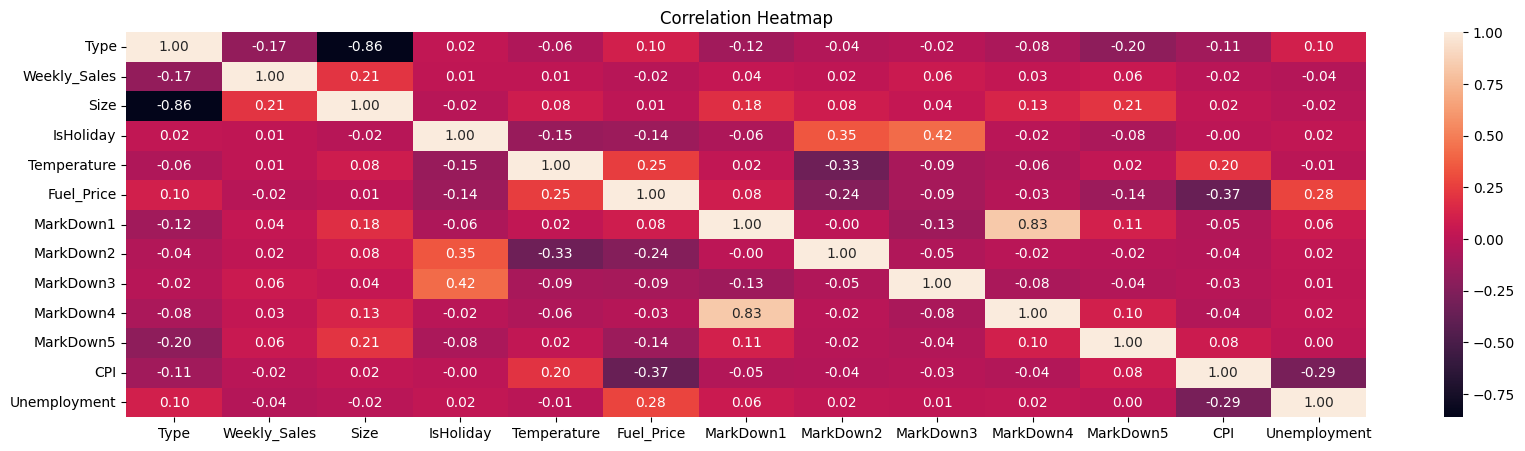

,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Type,1.000000,-0.174302,-0.862098,0.022630,-0.055506,0.101939,-0.115738,-0.043798,-0.018471,-0.075105,-0.195328,-0.113008,0.100618
Weekly_Sales,-0.174302,1.000000,0.212211,0.014535,0.012961,-0.020546,0.037275,0.016269,0.062728,0.029377,0.059846,-0.016554,-0.037486
Size,-0.862098,0.212211,1.000000,-0.023925,0.077973,0.005129,0.184732,0.081500,0.035260,0.133668,0.210764,0.019223,-0.015071
IsHoliday,0.022630,0.014535,-0.023925,1.000000,-0.153129,-0.136063,-0.062912,0.345232,0.423568,-0.017059,-0.076183,-0.002058,0.022667
Temperature,-0.055506,0.012961,0.077973,-0.153129,1.000000,0.250630,0.019305,-0.332352,-0.088292,-0.058005,0.024049,0.201049,-0.009198
Fuel_Price,0.101939,-0.020546,0.005129,-0.136063,0.250630,1.000000,0.084256,-0.243589,-0.093574,-0.025863,-0.137619,-0.365531,0.276679
MarkDown1,-0.115738,0.037275,0.184732,-0.062912,0.019305,0.084256,1.000000,-0.001513,-0.130843,0.828842,0.107287,-0.046049,0.064440
MarkDown2,-0.043798,0.016269,0.081500,0.345232,-0.332352,-0.243589,-0.001513,1.000000,-0.051278,-0.017324,-0.023356,-0.037285,0.018305
MarkDown3,-0.018471,0.062728,0.035260,0.423568,-0.088292,-0.093574,-0.130843,-0.051278,1.000000,-0.080265,-0.043403,-0.025277,0.014025
MarkDown4,-0.075105,0.029377,0.133668,-0.017059,-0.058005,-0.025863,0.828842,-0.017324,-0.080265,1.000000,0.101272,-0.041668,0.018801


In [39]:
# Calculate the correlation matrix
df_corr = df_main.drop(columns=['Day', 'Month', 'Year', 'Store', 'Dept','markdown']).dropna().corr()

# Create a heatmap
plt.figure(figsize=(20, 5))  # Adjust the figure size if needed
# setting the parameter values 
annot = True
sns.heatmap(df_corr, annot=annot, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
df_corr

In [40]:
# In heatmap shows 'Type' and 'Size' features have high correlaton and also relationship with weekly_sales other features are weak correlation with weekly_sales.

In [40]:
# make unique column of the dataframe - 'diff'
df_main['diff'] = df_main['Day'].astype(str)+df_main['Month'].astype(str)+df_main['Year'].astype(str)+'-'+df_main['Store'].astype(str)+'-'+df_main['Dept'].astype(str)
df_main.tail()

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,markdown,diff
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,1,2672013-45-94
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,1,2672013-45-95
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,1,2672013-45-96
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,1,2672013-45-97
551478,26,7,2013,45,98,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,1,2672013-45-98


In [41]:
# MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5 - features have huge number of null values compare to other features
# so need create 2 different models to predict weekly_sales and compare the performance of both model

# model 1 --> without MarkDowns(1-5) to predict weekly_sales
# model 2 --> with all MarkDowns(1-5) to predict weekly_sales

In [42]:
# check number of unique values in each features
df_main.nunique()

Day                 31
Month               12
Year                 4
Store               45
Dept                81
Type                 3
Weekly_Sales    358785
Size                40
IsHoliday            2
Temperature       4178
Fuel_Price        1011
MarkDown1         4023
MarkDown2         2715
MarkDown3         2885
MarkDown4         3405
MarkDown5         4045
CPI               2505
Unemployment       404
markdown             2
diff            551479
dtype: int64

Method 1 - Proceeding without Markdown

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

Steps to be followed:
1. Make new dataframe for only not-null value columns train Machine learning model and 'cpi'
2. Repeat and predict 'unemplyment' finally repeat and predict 'weekly_sales'

In [44]:
# drop all MarkDown(1-5) columns
df_m1 = df_main.copy()
df_m1.drop(columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','markdown'],inplace=True)
df_m1.tail(10)

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,diff
551469,26,7,2013,45,87,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-87
551470,26,7,2013,45,90,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-90
551471,26,7,2013,45,91,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-91
551472,26,7,2013,45,92,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-92
551473,26,7,2013,45,93,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-93
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-94
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-95
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-96
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-97
551478,26,7,2013,45,98,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-98


In [45]:
# make new dataframe for only not-null value columns and train Machine learning model to predict 'Weekly_Sales'

# filter null values into separate dataframe and reset index order
df_null = df_m1[df_m1['Weekly_Sales'].isnull()]
df_null.reset_index(drop=True, inplace=True)

# filter non-null values into a separate dataframe and reset index order
df_notnull = df_m1[df_m1['Weekly_Sales'].notnull()]
df_notnull.reset_index(drop=True, inplace=True)

# define feature and target variables
x = df_notnull.drop(columns=['Weekly_Sales', 'diff'], axis=1)
y = df_notnull['Weekly_Sales']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# train Random Forest model
rf = RandomForestRegressor().fit(x_train, y_train)
y_pred_test= rf.predict(x_test)
y_pred_train= rf.predict(x_train)

# evaluate the model
print('Mean squared error Train:', mean_squared_error(y_train, y_pred_train))
print('R-squared Train:', r2_score(y_train, y_pred_train))
print('Mean squared error Test:', mean_squared_error(y_test, y_pred_test))
print('R-squared Test:', r2_score(y_test, y_pred_test))

Mean squared error Train: 1646212.2006750808
R-squared Train: 0.9968006326270953
Mean squared error Test: 13812103.241185421
R-squared Test: 0.9736895662956376


In [49]:
# DecisionTreeRegressor algorithm
dtr = DecisionTreeRegressor().fit(x_train, y_train)
y_pred_test= dtr.predict(x_test)
y_pred_train= dtr.predict(x_train)

print('Mean squared error Train:', mean_squared_error(y_train, y_pred_train))
print('R-squared Train:', r2_score(y_train, y_pred_train))
print('Mean squared error Test:', mean_squared_error(y_test, y_pred_test))
print('R-squared Test:', r2_score(y_test, y_pred_test))

Mean squared error Train: 6.127693106743261e-32
R-squared Train: 1.0
Mean squared error Test: 23409807.27917319
R-squared Test: 0.9554070678668252


In [50]:
# GradientBoostingRegressor algorithm
gbr = GradientBoostingRegressor().fit(x_train, y_train)
y_pred_test= gbr.predict(x_test)
y_pred_train= gbr.predict(x_train)

print('Mean squared error Train:', mean_squared_error(y_train, y_pred_train))
print('R-squared Train:', r2_score(y_train, y_pred_train))
print('Mean squared error Test:', mean_squared_error(y_test, y_pred_test))
print('R-squared Test:', r2_score(y_test, y_pred_test))

Mean squared error Train: 132250164.89374736
R-squared Train: 0.7429755031284473
Mean squared error Test: 140136617.210858
R-squared Test: 0.7330562107524873


In [51]:
# XGBRegressor algorithm
xgb = XGBRegressor().fit(x_train, y_train)
y_pred_test= xgb.predict(x_test)
y_pred_train= xgb.predict(x_train)

print('Mean squared error Train:', mean_squared_error(y_train, y_pred_train))
print('R-squared Train:', r2_score(y_train, y_pred_train))
print('Mean squared error Test:', mean_squared_error(y_test, y_pred_test))
print('R-squared Test:', r2_score(y_test, y_pred_test))

Mean squared error Train: 26947633.41518113
R-squared Train: 0.947628028093722
Mean squared error Test: 29831861.38904001
R-squared Test: 0.9431738094011884


In [52]:
# AdaBoostRegressor algorithm
abr = AdaBoostRegressor().fit(x_train, y_train)
y_pred_test= abr.predict(x_test)
y_pred_train= abr.predict(x_train)

print('Mean squared error Train:', mean_squared_error(y_train, y_pred_train))
print('R-squared Train:', r2_score(y_train, y_pred_train))
print('Mean squared error Test:', mean_squared_error(y_test, y_pred_test))
print('R-squared Test:', r2_score(y_test, y_pred_test))

Mean squared error Train: 477145703.2998036
R-squared Train: 0.07268066982309396
Mean squared error Test: 478946397.19407535
R-squared Test: 0.08766339121018385


## Different Algorithm tried:

### Random Forest algorithm

Mean squared error Train: 1638812.3884208645

R-squared Train: 0.9968150139552631

Mean squared error Test: 13600762.080502085

R-squared Test: 0.9740921463734191

### DecisionTreeRegressor algorithm

Mean squared error Train: 5.859152694949078e-33

R-squared Train: 1.0

Mean squared error Test: 23508956.48166658

R-squared Test: 0.9552182002864508

### GradientBoostingRegressor algorithm

Mean squared error Train: 132250164.89374736

R-squared Train: 0.7429755031284473

Mean squared error Test: 140136617.21085802

R-squared Test: 0.7330562107524872

### XGBRegressor algorithm

Mean squared error Train: 26947633.41518113

R-squared Train: 0.947628028093722

Mean squared error Test: 29831861.38904001

R-squared Test: 0.9431738094011884

### AdaBoostRegressor algorithm

Mean squared error Train: 465733669.7445036

R-squared Train: 0.09485963788100782

Mean squared error Test: 467206056.81031024

R-squared Test: 0.11002736011049075

In [53]:
#saving the model without markdown
import pickle

with open('Randomforest_Model1.pkl', 'wb') as file:
    pickle.dump(rf, file)

In [54]:
with open("Randomforest_Model1.pkl","rb") as r1:
  regg_model=pickle.load(r1)

In [55]:
new_pred = regg_model.predict(np.array([[1,7,2024,9,9,9,151315,0,42.31,2.6,211.1,8.1]]))

In [56]:
# Display the predicted selling price
print("Weekly sales :", new_pred[0])

Weekly sales : 18902.975300000002


In [57]:
df_notnull

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,diff
0,5,2,2010,1,1,1,24924.50,151315,0,42.31,2.572,211.096358,8.106,522010-1-1
1,5,2,2010,1,2,1,50605.27,151315,0,42.31,2.572,211.096358,8.106,522010-1-2
2,5,2,2010,1,3,1,13740.12,151315,0,42.31,2.572,211.096358,8.106,522010-1-3
3,5,2,2010,1,4,1,39954.04,151315,0,42.31,2.572,211.096358,8.106,522010-1-4
4,5,2,2010,1,5,1,32229.38,151315,0,42.31,2.572,211.096358,8.106,522010-1-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420207,26,10,2012,45,93,2,2487.80,118221,0,58.85,3.882,192.308899,8.667,26102012-45-93
420208,26,10,2012,45,94,2,5203.31,118221,0,58.85,3.882,192.308899,8.667,26102012-45-94
420209,26,10,2012,45,95,2,56017.47,118221,0,58.85,3.882,192.308899,8.667,26102012-45-95
420210,26,10,2012,45,97,2,6817.48,118221,0,58.85,3.882,192.308899,8.667,26102012-45-97


In [58]:
df_notnull.to_csv('data_oct_12.csv') #conversion not required but use it to view the data

In [59]:
df_notnull.Type.unique()

array([1, 2, 3], dtype=int64)

In [60]:
df_notnull.Size.unique()

array([151315, 202307,  37392, 205863,  34875, 202505,  70713, 155078,
       125833, 126512, 207499, 112238, 219622, 200898, 123737,  57197,
        93188, 120653, 203819, 203742, 140167, 119557, 114533, 128107,
       152513, 204184, 206302,  93638,  42988, 203750, 203007,  39690,
       158114, 103681,  39910, 184109, 155083, 196321,  41062, 118221],
      dtype=int64)

Method 2 - Proceeding with Markdown

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

Steps to be followed:

1. Make new dataframe for only not-null value columns
2. Train Machine learning model and predict 'MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5' all are separately
    now add all MarkDown(1-5) values into dataframe based on 'diff' column
3. Repeat and predict 'cpi'
4. Repeat and predict 'unemplyment'
5. Finally repeat and predict 'weekly_sales'

In [62]:
# find Training and Testing accuracy of algorithm

def algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, algorithm):

    model = algorithm().fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    # algo = str(algorithm).split("'")[1].split(".")[-1]
    accuracy = {'algorithm': algorithm.__name__,
                'R2_train' : r2_train,
                'R2_test'  : r2_test}

    return accuracy

In [84]:
# check different algorithms and predict null values using best algorithm (Random Forest performs well compare to others)

def ml_regression(df, null_features, label):

    # only label column with null values and drop the other null columns from df
    df = df.drop(columns=null_features)

    # filter null values into separate dataframe and reset index order
    df_null = df[df[label].isnull()]
    df_null.reset_index(drop=True, inplace=True)

    # also filter non-null values into separate dataframe and reset index order
    df_notnull = df[df[label].notnull()]
    df_notnull.reset_index(drop=True, inplace=True)

    # make vector(x) and label(y) variables
    x = df_notnull.drop(columns=[label, 'diff'], axis=1)
    y = df_notnull[label]
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

    # calculate Training and Testing accuracy of different algorithms and evaluate model performance using metrics
    print(algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, DecisionTreeRegressor))
    print(algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, ExtraTreesRegressor))
    print(algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, RandomForestRegressor))
    print(algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, AdaBoostRegressor))
    print(algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, GradientBoostingRegressor))
    print(algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, XGBRegressor))

    # Random Forest algorithm performs well to predict unseen data
    model = RandomForestRegressor().fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # evaluate model performance using metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    metrics = {'R2': r2,
              'Mean Absolute Error': mae,
              'Mean Squared Error': mse,
              'Root Mean Squared Error': rmse}
    print(metrics)

    # predict null values using model
    y_pred = model.predict(df_null.drop(columns=[label, 'diff'], axis=1)) #After completing the ML process if we get missing values in weekly sale comment this line

    # make dataframe of predicted label value and merge with non-null values
    df_null[label] = pd.DataFrame(y_pred)
    df_final = pd.concat([df_null,df_notnull], axis=0, ignore_index=True) #After completing the ML process if we get missing values in weekly sale comment this line
    return df_null[label]

In [64]:
# drop the 'markdown' column and copy to new variable

df_main2 = df_main.copy()
df_main2.drop(columns=['markdown'],inplace=True)
df_main2.tail()

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,diff
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,2672013-45-94
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,2672013-45-95
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,2672013-45-96
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,2672013-45-97
551478,26,7,2013,45,98,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,2672013-45-98


In [65]:
# make new dataframe for only not-null value columns and train Machine learning model to predict 'MarkDown1'

df_markdown1 = ml_regression(df_main2, ['Weekly_Sales','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment'], 'MarkDown1')
df_markdown1

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 1.0, 'R2_test': 0.999999986705425}
{'algorithm': 'RandomForestRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.2394208549012593, 'R2_test': 0.21613515765039515}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.7352115318939549, 'R2_test': 0.7305275439003723}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9834102649499823, 'R2_test': 0.9824573942937473}
{'R2': 1.0, 'Mean Absolute Error': 9.129028356333688e-12, 'Mean Squared Error': 3.113460979486696e-22, 'Root Mean Squared Error': 1.7645002067120015e-11}


,Day,Month,Year,Store,Dept,Type,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,diff
0,5,2,2010,1,1,1,151315,0,42.31,2.572,6745.9325,522010-1-1
1,5,2,2010,1,2,1,151315,0,42.31,2.572,6745.9325,522010-1-2
2,5,2,2010,1,3,1,151315,0,42.31,2.572,6745.9325,522010-1-3
3,5,2,2010,1,4,1,151315,0,42.31,2.572,6745.9325,522010-1-4
4,5,2,2010,1,5,1,151315,0,42.31,2.572,6745.9325,522010-1-5
...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,118221,0,76.06,3.804,212.0200,2672013-45-94
551475,26,7,2013,45,95,2,118221,0,76.06,3.804,212.0200,2672013-45-95
551476,26,7,2013,45,96,2,118221,0,76.06,3.804,212.0200,2672013-45-96
551477,26,7,2013,45,97,2,118221,0,76.06,3.804,212.0200,2672013-45-97


In [66]:
# make new dataframe for only not-null value columns and train Machine learning model to predict 'MarkDown2'

df_markdown2 = ml_regression(df_main2, ['Weekly_Sales','MarkDown1','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment'], 'MarkDown2')
df_markdown2

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 1.0, 'R2_test': 0.9999999564005393}
{'algorithm': 'RandomForestRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.3862237824575697, 'R2_test': 0.4128806382044583}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.8638693425781767, 'R2_test': 0.8649433796841947}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9985328237779256, 'R2_test': 0.9985424037054653}
{'R2': 1.0, 'Mean Absolute Error': 4.219111962557823e-12, 'Mean Squared Error': 1.8321570942070804e-22, 'Root Mean Squared Error': 1.3535719759979816e-11}


,Day,Month,Year,Store,Dept,Type,Size,IsHoliday,Temperature,Fuel_Price,MarkDown2,diff
0,5,2,2010,1,1,1,151315,0,42.31,2.572,6569.0482,522010-1-1
1,5,2,2010,1,2,1,151315,0,42.31,2.572,6569.0482,522010-1-2
2,5,2,2010,1,3,1,151315,0,42.31,2.572,6569.0482,522010-1-3
3,5,2,2010,1,4,1,151315,0,42.31,2.572,6569.0482,522010-1-4
4,5,2,2010,1,5,1,151315,0,42.31,2.572,6569.0482,522010-1-5
...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,118221,0,76.06,3.804,851.7300,2672013-45-94
551475,26,7,2013,45,95,2,118221,0,76.06,3.804,851.7300,2672013-45-95
551476,26,7,2013,45,96,2,118221,0,76.06,3.804,851.7300,2672013-45-96
551477,26,7,2013,45,97,2,118221,0,76.06,3.804,851.7300,2672013-45-97


In [67]:
# make new dataframe for only not-null value columns and train Machine learning model to predict 'MarkDown3'

df_markdown3 = ml_regression(df_main2, ['Weekly_Sales','MarkDown1','MarkDown2','MarkDown4','MarkDown5','CPI','Unemployment'], 'MarkDown3')
df_markdown3

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 1.0, 'R2_test': 0.9999999877016348}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9999999999997864, 'R2_test': 0.999999999999596}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.9152863066084991, 'R2_test': 0.9129684239609857}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.9300257518897349, 'R2_test': 0.9331815059628381}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9999644581283654, 'R2_test': 0.9999626177908011}
{'R2': 0.9999999999990017, 'Mean Absolute Error': 0.0002785032619477145, 'Mean Squared Error': 0.00013026871121669264, 'Root Mean Squared Error': 0.011413531934361626}


,Day,Month,Year,Store,Dept,Type,Size,IsHoliday,Temperature,Fuel_Price,MarkDown3,diff
0,5,2,2010,1,1,1,151315,0,42.31,2.572,141.7024,522010-1-1
1,5,2,2010,1,2,1,151315,0,42.31,2.572,141.7024,522010-1-2
2,5,2,2010,1,3,1,151315,0,42.31,2.572,141.7024,522010-1-3
3,5,2,2010,1,4,1,151315,0,42.31,2.572,141.7024,522010-1-4
4,5,2,2010,1,5,1,151315,0,42.31,2.572,141.7024,522010-1-5
...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,118221,0,76.06,3.804,2.0600,2672013-45-94
551475,26,7,2013,45,95,2,118221,0,76.06,3.804,2.0600,2672013-45-95
551476,26,7,2013,45,96,2,118221,0,76.06,3.804,2.0600,2672013-45-96
551477,26,7,2013,45,97,2,118221,0,76.06,3.804,2.0600,2672013-45-97


In [68]:
# make new dataframe for only not-null value columns and train Machine learning model to predict 'MarkDown4'

df_markdown4 = ml_regression(df_main2, ['Weekly_Sales','MarkDown1','MarkDown2','MarkDown3','MarkDown5','CPI','Unemployment'], 'MarkDown4')
df_markdown4

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 1.0, 'R2_test': 0.9999999965475571}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9999999999927698, 'R2_test': 0.9999999999649007}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.5668052535945458, 'R2_test': 0.5651970822499798}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.7905926816110778, 'R2_test': 0.7945209284548651}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9936633875058177, 'R2_test': 0.9935120951513182}
{'R2': 0.9999999999364297, 'Mean Absolute Error': 0.0009693806595652156, 'Mean Squared Error': 0.003000636899859181, 'Root Mean Squared Error': 0.05477806951562989}


,Day,Month,Year,Store,Dept,Type,Size,IsHoliday,Temperature,Fuel_Price,MarkDown4,diff
0,5,2,2010,1,1,1,151315,0,42.31,2.572,21949.8375,522010-1-1
1,5,2,2010,1,2,1,151315,0,42.31,2.572,21949.8375,522010-1-2
2,5,2,2010,1,3,1,151315,0,42.31,2.572,21949.8375,522010-1-3
3,5,2,2010,1,4,1,151315,0,42.31,2.572,21949.8375,522010-1-4
4,5,2,2010,1,5,1,151315,0,42.31,2.572,21949.8375,522010-1-5
...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,118221,0,76.06,3.804,10.8800,2672013-45-94
551475,26,7,2013,45,95,2,118221,0,76.06,3.804,10.8800,2672013-45-95
551476,26,7,2013,45,96,2,118221,0,76.06,3.804,10.8800,2672013-45-96
551477,26,7,2013,45,97,2,118221,0,76.06,3.804,10.8800,2672013-45-97


In [69]:
# make new dataframe for only not-null value columns and train Machine learning model to predict 'MarkDown5'

df_markdown5 = ml_regression(df_main2, ['Weekly_Sales','MarkDown1','MarkDown2','MarkDown3','MarkDown4','CPI','Unemployment'], 'MarkDown5')
df_markdown5

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 1.0, 'R2_test': 0.9999999993813429}
{'algorithm': 'RandomForestRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.6558170886217899, 'R2_test': 0.6179985847074827}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.9173570485072587, 'R2_test': 0.911283996799991}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9969610229482613, 'R2_test': 0.9965642410507974}
{'R2': 1.0, 'Mean Absolute Error': 4.883301016020384e-12, 'Mean Squared Error': 7.129614144677443e-23, 'Root Mean Squared Error': 8.443704249129906e-12}


,Day,Month,Year,Store,Dept,Type,Size,IsHoliday,Temperature,Fuel_Price,MarkDown5,diff
0,5,2,2010,1,1,1,151315,0,42.31,2.572,4798.6397,522010-1-1
1,5,2,2010,1,2,1,151315,0,42.31,2.572,4798.6397,522010-1-2
2,5,2,2010,1,3,1,151315,0,42.31,2.572,4798.6397,522010-1-3
3,5,2,2010,1,4,1,151315,0,42.31,2.572,4798.6397,522010-1-4
4,5,2,2010,1,5,1,151315,0,42.31,2.572,4798.6397,522010-1-5
...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,118221,0,76.06,3.804,1864.5700,2672013-45-94
551475,26,7,2013,45,95,2,118221,0,76.06,3.804,1864.5700,2672013-45-95
551476,26,7,2013,45,96,2,118221,0,76.06,3.804,1864.5700,2672013-45-96
551477,26,7,2013,45,97,2,118221,0,76.06,3.804,1864.5700,2672013-45-97


In [70]:
df_main2

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,diff
0,5,2,2010,1,1,1,24924.50,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,522010-1-1
1,5,2,2010,1,2,1,50605.27,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,522010-1-2
2,5,2,2010,1,3,1,13740.12,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,522010-1-3
3,5,2,2010,1,4,1,39954.04,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,522010-1-4
4,5,2,2010,1,5,1,32229.38,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,522010-1-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,2672013-45-94
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,2672013-45-95
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,2672013-45-96
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,2672013-45-97


In [71]:
# remove all old MarkDown(1-5) columns from df_m1

df_main2 = df_main2.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis=1)
df_main2.tail()

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,diff
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-94
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-95
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-96
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-97
551478,26,7,2013,45,98,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-98


In [72]:
# now merge all new predicted 'MarkDown(1-5)' columns --> one by one with df_m1 dataframe --> based on 'diff' column

df_main2 = pd.merge(df_main2, df_markdown1[['MarkDown1', 'diff']], on='diff', how='inner')
df_main2 = pd.merge(df_main2, df_markdown2[['MarkDown2', 'diff']], on='diff', how='inner')
df_main2 = pd.merge(df_main2, df_markdown3[['MarkDown3', 'diff']], on='diff', how='inner')
df_main2 = pd.merge(df_main2, df_markdown4[['MarkDown4', 'diff']], on='diff', how='inner')
df_main2 = pd.merge(df_main2, df_markdown5[['MarkDown5', 'diff']], on='diff', how='inner')
df_main2

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,diff,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,5,2,2010,1,1,1,24924.50,151315,0,42.31,2.572,211.096358,8.106,522010-1-1,6745.9325,6569.0482,141.7024,21949.8375,4798.6397
1,5,2,2010,1,2,1,50605.27,151315,0,42.31,2.572,211.096358,8.106,522010-1-2,6745.9325,6569.0482,141.7024,21949.8375,4798.6397
2,5,2,2010,1,3,1,13740.12,151315,0,42.31,2.572,211.096358,8.106,522010-1-3,6745.9325,6569.0482,141.7024,21949.8375,4798.6397
3,5,2,2010,1,4,1,39954.04,151315,0,42.31,2.572,211.096358,8.106,522010-1-4,6745.9325,6569.0482,141.7024,21949.8375,4798.6397
4,5,2,2010,1,5,1,32229.38,151315,0,42.31,2.572,211.096358,8.106,522010-1-5,6745.9325,6569.0482,141.7024,21949.8375,4798.6397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-94,212.0200,851.7300,2.0600,10.8800,1864.5700
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-95,212.0200,851.7300,2.0600,10.8800,1864.5700
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-96,212.0200,851.7300,2.0600,10.8800,1864.5700
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-97,212.0200,851.7300,2.0600,10.8800,1864.5700


In [73]:
df_main2.isnull().sum()

Day                  0
Month                0
Year                 0
Store                0
Dept                 0
Type                 0
Weekly_Sales    131267
Size                 0
IsHoliday            0
Temperature          0
Fuel_Price           0
CPI              43303
Unemployment     43303
diff                 0
MarkDown1            0
MarkDown2            0
MarkDown3            0
MarkDown4            0
MarkDown5            0
dtype: int64

In [74]:
df_main2.describe().T

,count,mean,std,min,25%,50%,75%,max
Day,551479.0,15.653488,8.776044,1.000,8.000000,16.000000,23.000000,31.000000
Month,551479.0,6.277180,3.340134,1.000,3.000000,6.000000,9.000000,12.000000
Year,551479.0,2011.392758,1.054086,2010.000,2010.000000,2011.000000,2012.000000,2013.000000
Store,551479.0,22.270485,12.796872,1.000,11.000000,22.000000,33.000000,45.000000
Dept,551479.0,44.603013,30.416079,1.000,19.000000,38.000000,74.000000,99.000000
Type,551479.0,1.594791,0.669624,1.000,1.000000,1.000000,2.000000,3.000000
Weekly_Sales,420212.0,16033.114591,22729.492116,0.010,2120.130000,7661.700000,20271.265000,693099.360000
Size,551479.0,136073.691863,61207.331445,34875.000,93638.000000,128107.000000,202505.000000,219622.000000
IsHoliday,551479.0,0.071905,0.258330,0.000,0.000000,0.000000,0.000000,1.000000
Temperature,551479.0,58.703624,18.685408,-7.290,45.160000,59.940000,73.160000,101.950000


In [75]:
df_main2["CPI"].fillna(df_main2["CPI"].mode().iloc[0],inplace=True)
df_main2["Unemployment"].fillna(df_main2["Unemployment"].mode().iloc[0],inplace=True)

In [81]:
df_main2["Weekly_Sales"].fillna(df_main2["Weekly_Sales"].mean(), inplace=True)

In [82]:
df_main2.isnull().sum()

Day             0
Month           0
Year            0
Store           0
Dept            0
Type            0
Weekly_Sales    0
Size            0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
diff            0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
dtype: int64

In [85]:
# finally train Machine learning model with df_m1 --> to predict 'Weekly_Sales'

df_weekly_sales = ml_regression(df_main2, ['IsHoliday','Temperature','Fuel_Price','CPI','Unemployment','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], 'Weekly_Sales')
df_weekly_sales

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 0.9607269013499141}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 0.9999999704604046, 'R2_test': 0.9722343131187364}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9965788173596785, 'R2_test': 0.9760174180048308}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.1593821852603089, 'R2_test': 0.1608364651579145}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.6260522186065192, 'R2_test': 0.6245444380361814}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9202991469301824, 'R2_test': 0.9151247538170866}
{'R2': 0.9762842721796343, 'Mean Absolute Error': 1099.5035089838852, 'Mean Squared Error': 9359180.923772147, 'Root Mean Squared Error': 3059.2778435068867}


0         16033.114591
1         76003.206300
2         16033.114591
3         16033.114591
4           102.403900
              ...     
110291    20084.890900
110292     3374.798764
110293     1544.162113
110294     9081.141400
110295    13168.441000
Name: Weekly_Sales, Length: 110296, dtype: float64

In [78]:
df_main2.isnull().sum()

Day                  0
Month                0
Year                 0
Store                0
Dept                 0
Type                 0
Weekly_Sales    131267
Size                 0
IsHoliday            0
Temperature          0
Fuel_Price           0
CPI                  0
Unemployment         0
diff                 0
MarkDown1            0
MarkDown2            0
MarkDown3            0
MarkDown4            0
MarkDown5            0
dtype: int64

In [79]:
# filter null values into separate dataframe and reset index order
df_null = df_main2[df_main2['Weekly_Sales'].isnull()]
df_null.reset_index(drop=True, inplace=True)

# also filter non-null values into separate dataframe and reset index order
df_notnull = df_main2[df_main2['Weekly_Sales'].notnull()]
df_notnull.reset_index(drop=True, inplace=True)

# make vector(x) and label(y) variables
x = df_notnull.drop(columns=['Weekly_Sales', 'diff'], axis=1)
y = df_notnull['Weekly_Sales']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Random Forest algorithm performs well to predict unseen data
rfmodel = RandomForestRegressor().fit(x_train, y_train)
y_pred = rfmodel.predict(x_test)

# evaluate model performance using metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

metrics = {'R2': r2,
           'Mean Absolute Error': mae,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}

print(metrics)

{'R2': 0.9736860275354734, 'Mean Absolute Error': 1430.4466016848517, 'Mean Squared Error': 13339763.198213942, 'Root Mean Squared Error': 3652.3640560894178}


In [89]:
#saving the model without markdown
import pickle

with open('Randomforest_Model2.pkl', 'wb') as file:
    pickle.dump(rfmodel, file)

In [90]:
with open("Randomforest_Model2.pkl","rb") as r1:
  regg_model1=pickle.load(r1)

In [86]:
df_main2.isnull().sum()

Day             0
Month           0
Year            0
Store           0
Dept            0
Type            0
Weekly_Sales    0
Size            0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
diff            0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
dtype: int64

In [88]:
df_main2.head()

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,diff,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,5,2,2010,1,1,1,24924.50,151315,0,42.31,2.572,211.096358,8.106,522010-1-1,6745.9325,6569.0482,141.7024,21949.8375,4798.6397
1,5,2,2010,1,2,1,50605.27,151315,0,42.31,2.572,211.096358,8.106,522010-1-2,6745.9325,6569.0482,141.7024,21949.8375,4798.6397
2,5,2,2010,1,3,1,13740.12,151315,0,42.31,2.572,211.096358,8.106,522010-1-3,6745.9325,6569.0482,141.7024,21949.8375,4798.6397
3,5,2,2010,1,4,1,39954.04,151315,0,42.31,2.572,211.096358,8.106,522010-1-4,6745.9325,6569.0482,141.7024,21949.8375,4798.6397
4,5,2,2010,1,5,1,32229.38,151315,0,42.31,2.572,211.096358,8.106,522010-1-5,6745.9325,6569.0482,141.7024,21949.8375,4798.6397


In [96]:
new_pred_2 = regg_model1.predict(np.array([[5,2,2010,1,1,1,151315,0,42.31,2.572,211.096358,8.106,6745.9325,6569.0482,141.7024,21949.8375,4798.6397]]))

In [97]:
# Display the predicted selling price
print("Weekly sales :", new_pred_2[0])

Weekly sales : 23706.687599999994


In [98]:
df_main2.to_csv('data_final.csv')

In [99]:
df_main2.Type.unique()

array([1, 2, 3], dtype=int64)

In [100]:
df_main2.Size.unique()

array([151315, 202307,  37392, 205863,  34875, 202505,  70713, 155078,
       125833, 126512, 207499, 112238, 219622, 200898, 123737,  57197,
        93188, 120653, 203819, 203742, 140167, 119557, 114533, 128107,
       152513, 204184, 206302,  93638,  42988, 203750, 203007,  39690,
       158114, 103681,  39910, 184109, 155083, 196321,  41062, 118221],
      dtype=int64)